## 範例：使用 Huggingface 上的模型
任務：詞性標註（POS-tagging）




*   模型來源：https://huggingface.co/QCRI/bert-base-multilingual-cased-pos-english
*   論文：https://arxiv.org/pdf/2206.13289.pdf



Maty note: 喜歡這個作者的手繪圖，給大家參考：https://towardsdatascience.com/named-entity-recognition-with-bert-in-pytorch-a454405e0b6a

### 以字詞為單位的分類，就稱為 **token classification**，以下都可涵蓋此分類領域：

*   命名實體識別（Name Entity Recognition, NER）
*   <b><font color='red'>詞性標註（Part-of-speech tagging, POS）</font></b>



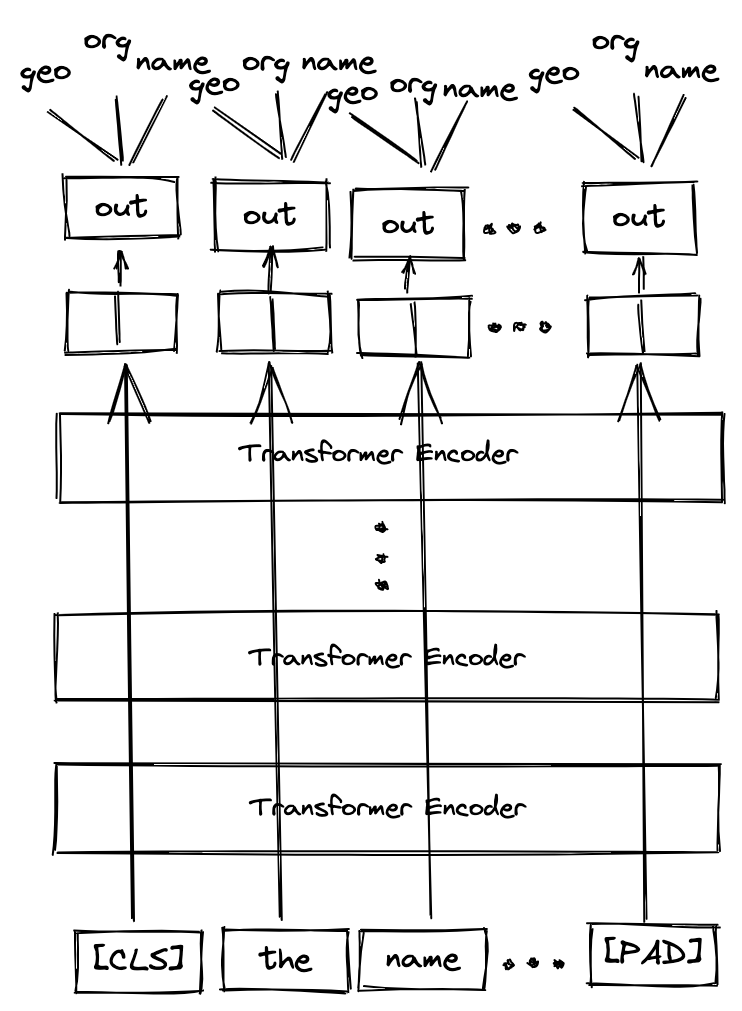

In [1]:
!pip install transformers

In [2]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, TokenClassificationPipeline

model_name = "QCRI/bert-base-multilingual-cased-pos-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

input_text = 'Maty had a little sheep'

pipeline = TokenClassificationPipeline(model=model, tokenizer=tokenizer)
outputs = pipeline(input_text)

#print(outputs)
input_text_list = input_text.split()

for g,p in zip(input_text_list, outputs):
    print(g, p)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/2.12k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/712M [00:00<?, ?B/s]

Some weights of the model checkpoint at QCRI/bert-base-multilingual-cased-pos-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Maty {'entity': 'NNP', 'score': 0.981797, 'index': 1, 'word': 'Mat', 'start': 0, 'end': 3}
had {'entity': 'NNP', 'score': 0.9929202, 'index': 2, 'word': '##y', 'start': 3, 'end': 4}
a {'entity': 'VBD', 'score': 0.99952507, 'index': 3, 'word': 'had', 'start': 5, 'end': 8}
little {'entity': 'DT', 'score': 0.99977094, 'index': 4, 'word': 'a', 'start': 9, 'end': 10}
sheep {'entity': 'JJ', 'score': 0.9991861, 'index': 5, 'word': 'little', 'start': 11, 'end': 17}


In [3]:
# 中文呢? 嘗試一下！
input_text = '我有一隻小小羊'

pipeline = TokenClassificationPipeline(model=model, tokenizer=tokenizer)
outputs = pipeline(input_text)

for g,p in zip(list(input_text), outputs):
    print(g, p)

我 {'entity': 'PRP', 'score': 0.9993266, 'index': 1, 'word': '我', 'start': 0, 'end': 1}
有 {'entity': 'VBP', 'score': 0.51323986, 'index': 2, 'word': '有', 'start': 1, 'end': 2}
一 {'entity': 'CD', 'score': 0.8690334, 'index': 3, 'word': '一', 'start': 2, 'end': 3}
隻 {'entity': 'NN', 'score': 0.9256258, 'index': 4, 'word': '隻', 'start': 3, 'end': 4}
小 {'entity': 'JJ', 'score': 0.99645704, 'index': 5, 'word': '小', 'start': 4, 'end': 5}
小 {'entity': 'JJ', 'score': 0.8048672, 'index': 6, 'word': '小', 'start': 5, 'end': 6}
羊 {'entity': 'NN', 'score': 0.98836654, 'index': 7, 'word': '羊', 'start': 6, 'end': 7}


## 詞性標註表

參考資料：https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html

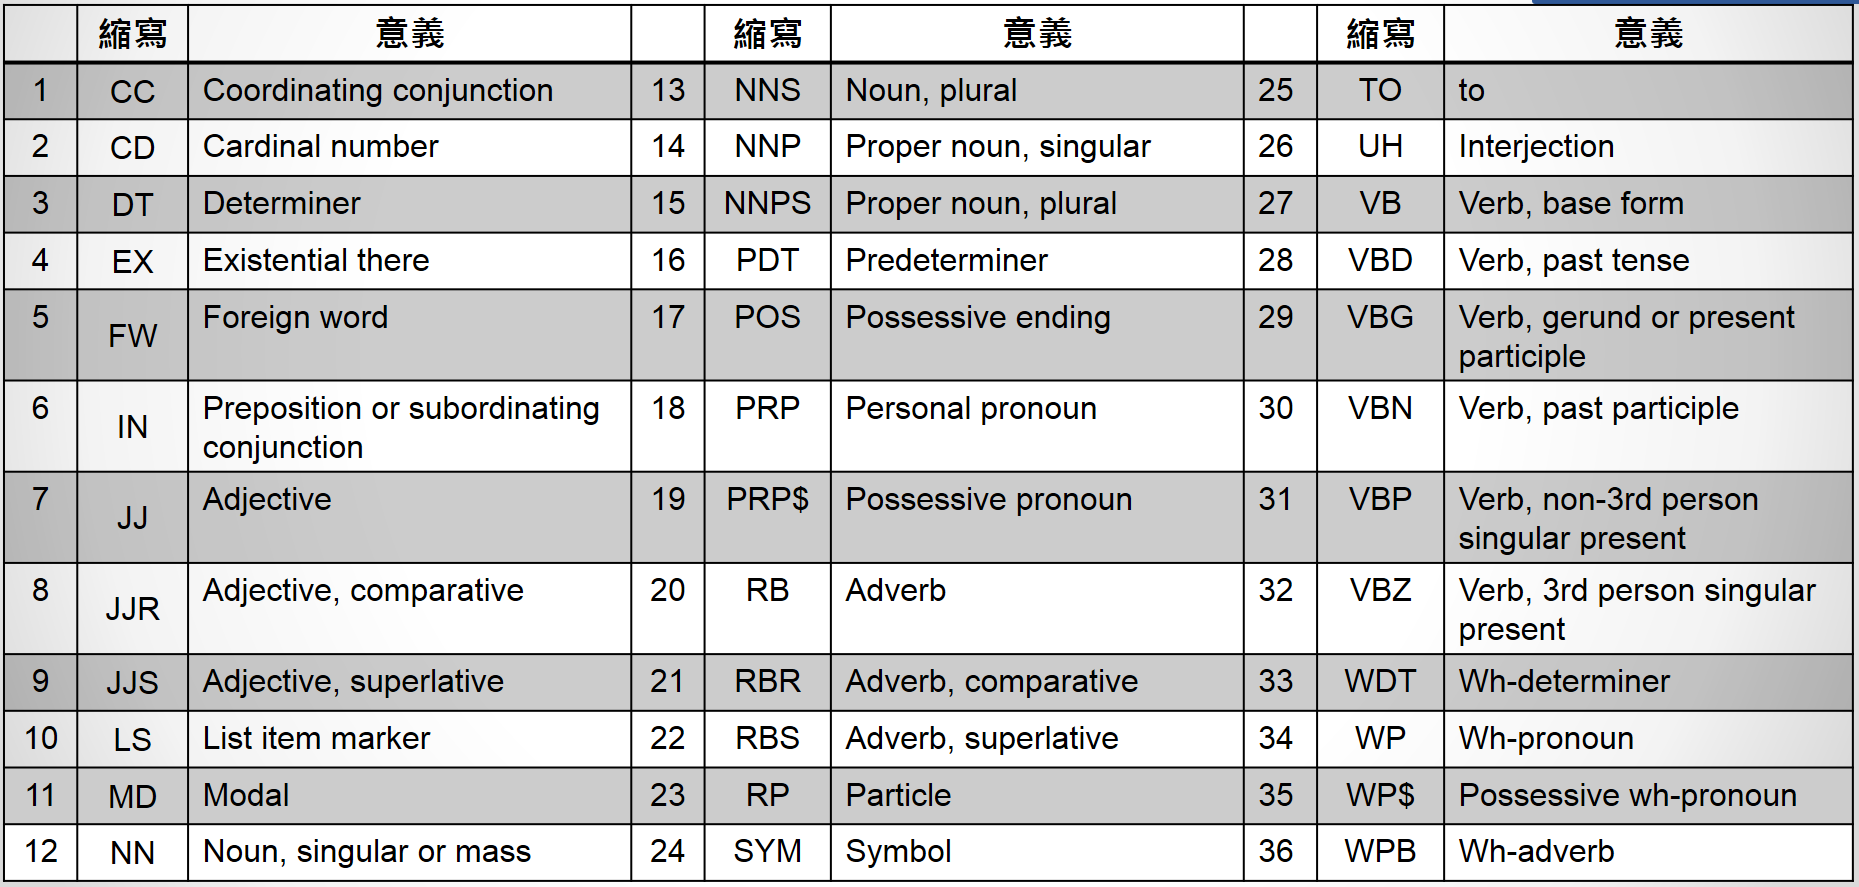